In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np

In [28]:
# 예측할 데이터
data = {
    "admi_cty_no": [41590590],
    "card_tpbuz_cd": ["D01"],
    "amt": [365433405],  # 예측에서는 사용되지 않음
    "cnt": [906],
    "TOTAL_POPULATION": [7667999.44	],
    "운영점포평균영업기간": [37.7],
    "폐업점포평균영업기간": [33.8],
    "상권변동지표구분": ["LH"]
}

df_predict = pd.DataFrame(data)
df_predict = TabularDataset(df_predict)

In [ ]:
predictor2 = TabularPredictor.load(r"AutogluonModels\ag-20240718_004914")
y_pred = predictor2.predict(df_predict.drop(columns=['amt']))

In [30]:
print("실제값: 365433405")
print("예측값:", y_pred.iloc[0])

실제값: 365433405
예측값: 305830000.0


In [5]:
df_predict

,admi_cty_no,card_tpbuz_cd,amt,cnt,TOTAL_POPULATION,운영점포평균영업기간,폐업점포평균영업기간,상권변동지표구분
0,41210510,D05,633562,28,13850.98,188.5,358.0,HH


In [9]:
y_pred

0    1449026.625
Name: amt, dtype: float32

In [3]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np

data = {
    "admi_cty_no": [41590590],
    "card_tpbuz_cd": ["Q04"],
    "amt": [5],  # 예측에서는 사용되지 않음
    "cnt": [906], # DB에서 불러오기 
    "TOTAL_POPULATION": [7667999.44	], # DB에서 불러오기
    "운영점포평균영업기간": [37.7], # DB에서 불러오기
    "폐업점포평균영업기간": [33.8], # DB에서 불러오기
    "상권변동지표구분": ["LL"] # DB에서 불러오기
}

df_predict = pd.DataFrame(data)
df_predict = TabularDataset(df_predict)

predictor2 = TabularPredictor.load(r"AutogluonModels\ag-20240718_004914")
y_pred = predictor2.predict(df_predict.drop(columns=['amt']))

print("실제값: 365433405")
print("예측값:", y_pred.iloc[0])

This means that the predictor was fit in an AutoGluon version `<=0.3.1`.


FileNotFoundError: [Errno 2] No such file or directory: 'AutogluonModels\\ag-20240718_004914\\predictor.pkl'

In [ ]:
from autogluon.tabular import TabularDataset, TabularPredictor
import pandas as pd
import numpy as np

data = {
    "admi_cty_no": [41210520],
    "card_tpbuz_cd": ["Q04"],
    "amt": [5],  # 예측에서는 사용되지 않음
    "cnt": [480], # DB에서 불러오기 
    "TOTAL_POPULATION": [383145.55	], # DB에서 불러오기
    "운영점포평균영업기간": [121.8], # DB에서 불러오기
    "폐업점포평균영업기간": [113.2], # DB에서 불러오기
    "상권변동지표구분": ["HH"] # DB에서 불러오기
}

df_predict = pd.DataFrame(data)
df_predict = TabularDataset(df_predict)

predictor2 = TabularPredictor.load(r"AutogluonModels\ag-20240715_073451")
y_pred = predictor2.predict(df_predict.drop(columns=['amt']))

print("실제값: 365433405")
print("예측값:", y_pred.iloc[0])

In [1]:
import autogluon.tabular
import pandas as pd
import numpy as np
import sklearn

print("autogluon.tabular version:", autogluon.tabular.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)
print("scikit-learn version:", sklearn.__version__)


autogluon.tabular version: 1.1.1
pandas version: 2.0.0
numpy version: 1.24.4
scikit-learn version: 1.3.0


In [16]:
import shap
import dask.dataframe as dd
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
class AutogluonWrapper:
    def __init__(self, predictor, feature_names):
        self.ag_model = predictor
        self.feature_names = feature_names
    
    def predict_proba(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.feature_names)
        return self.ag_model.predict_proba(X)
    def predict(self, X):
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X, columns=self.feature_names)
        return self.ag_model.predict(X).values

In [18]:
df = dd.read_csv('preprocessed.csv',encoding='utf-8')
train_data=pd.read_csv('train_df.csv',encoding='utf-8')
test_data=pd.read_csv('test_df.csv',encoding='utf-8')

In [19]:
label = 'amt'

y_train = train_data[label]
y_test = test_data[label]
X_train = pd.DataFrame(train_data.drop(columns=[label]))
X_test = pd.DataFrame(test_data.drop(columns=[label]))

In [20]:
predictor = TabularPredictor.load(r"AutogluonModels\ag-20240715_073451")

In [21]:
lb = predictor.leaderboard()

In [26]:
predictor.feature_importance(test_data)

Trying to unpickle estimator ExtraTreeRegressor from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



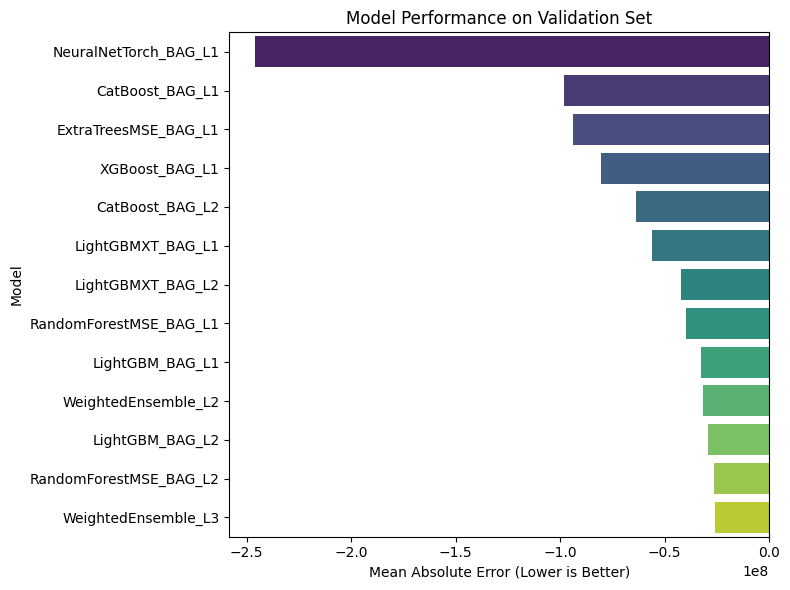

In [25]:
df = pd.DataFrame(lb)
df = df.dropna(subset=['score_val'])

# score_val 기준으로 정렬
df = df.sort_values(by='score_val')

# 시각화
plt.figure(figsize=(8, 6))  # 이미지 크기를 줄임
sns.barplot(x='score_val', y='model', data=df, palette='viridis')

plt.title('Model Performance on Validation Set')
plt.xlabel('Mean Absolute Error (Lower is Better)')
plt.ylabel('Model')

plt.tight_layout()
plt.show()

In [7]:
baseline = X_train.sample(100)

In [10]:
ag_wrapper = AutogluonWrapper(predictor, X_train.columns)
explainer = shap.KernelExplainer(ag_wrapper.predict, baseline)

Provided model function fails when applied to the provided data set.


Trying to unpickle estimator ExtraTreeRegressor from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


ValueError: node array from the pickle has an incompatible dtype:
- expected: {'names': ['left_child', 'right_child', 'feature', 'threshold', 'impurity', 'n_node_samples', 'weighted_n_node_samples', 'missing_go_to_left'], 'formats': ['<i8', '<i8', '<i8', '<f8', '<f8', '<i8', '<f8', 'u1'], 'offsets': [0, 8, 16, 24, 32, 40, 48, 56], 'itemsize': 64}
- got     : [('left_child', '<i8'), ('right_child', '<i8'), ('feature', '<i8'), ('threshold', '<f8'), ('impurity', '<f8'), ('n_node_samples', '<i8'), ('weighted_n_node_samples', '<f8')]

In [21]:
baseline = X_train.median().values.reshape(1, -1)
ag_wrapper = AutogluonWrapper(predictor, X_train.columns)

# KernelExplainer를 사용하여 SHAP 값을 계산
explainer = shap.KernelExplainer(ag_wrapper.predict, baseline)
shap_values = explainer.shap_values(X_train)

TypeError: could not convert string to float: 'F02'